# **Predictive Analytics Proyek Machine Learning Terapan**
- **Nama:** Muhammad Makarim
- **Email:** mmakarim9@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1427

# Business Understanding

Proyek ini bertujuan untuk melakukan analisis prediktif terhadap perilaku sosial dan trait kepribadian individu dengan menganalisis dataset yang berisi respons mengenai pengalaman sosial mereka. Fokus utama dari penelitian ini adalah untuk memahami bagaimana sifat kepribadian, terutama perbedaan antara introvert dan extrovert, mempengaruhi keterlibatan sosial serta emosi yang dialami setelah berpartisipasi dalam aktivitas sosial.

Rumusan Masalah:
1. Apa hubungan antara "time spent alone," "social event attendance," dan "stage fear" dengan tipe kepribadian individu?
2. Bagaimana individu dengan kepribadian introvert dan extrovert berbeda dalam keterlibatan sosial mereka?
3. Apa peran dari variabel seperti "drained after socialization" dan "post frequency" dalam mempengaruhi perilaku individu di media sosial?

# Data Loading

In [1]:
!pip install --quiet gdown

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown
%matplotlib inline
import seaborn as sns

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [145]:
file_id = '1_-IURMcjlbBYYE4p0xLepI4yVGJdEbHr'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

output = 'Personality.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1_-IURMcjlbBYYE4p0xLepI4yVGJdEbHr
To: /content/Personality.csv
100%|██████████| 107k/107k [00:00<00:00, 14.4MB/s]


'Personality.csv'

In [146]:
df_personality = pd.read_csv(output)
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Exploratory Data Analysis - Personality (Data Understanding)

**Data Understanding**

Dataset ini memiliki beberapa variabel yang berhubungan dengan perilaku sosial dan sifat kepribadian individu. Berikut adalah deskripsi dasar dari setiap variabel:
1. `Time_spent_Alone`:
*   Tipe: Numerik
*   Deskripsi: Mengindikasikan jumlah waktu, dalam jam, yang dihabiskan sendirian dalam seminggu.

2. `Stage_fear`:
*   Tipe: Kategorikal (Ya/Tidak)
*   Deskripsi: Menunjukkan apakah individu memiliki rasa takut saat tampil di depan umum.

3. `Social_event_atte`:
*   Tipe: Kategorikal (Ya/Tidak)
*   Deskripsi: Menunjukkan apakah individu menghadiri acara sosial.

4. `Drained_after_so`:
*   Tipe: Kategorikal (Ya/Tidak)
*   Deskripsi: Menunjukkan apakah individu merasa kelelahan setelah berinteraksi sosial.

5. `Friends_circle_si`:
*   Tipe: Numerik
*   Deskripsi: Menunjukkan ukuran lingkaran pertemanan individu.

6. `Post_frequency`:
*   Tipe: Numerik
*   Deskripsi: Mengindikasikan frekuensi individu dalam memposting di media sosial.

7. `Personality`:
*   Tipe: Kategorikal (Introvert/Ekstrovert)
*  Deskripsi: Klasifikasi kepribadian individu berdasarkan hasil analisis.




In [103]:
# Statistik deskriptif untuk variabel numerik
print(df_personality.describe())

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max              15.000000       10.

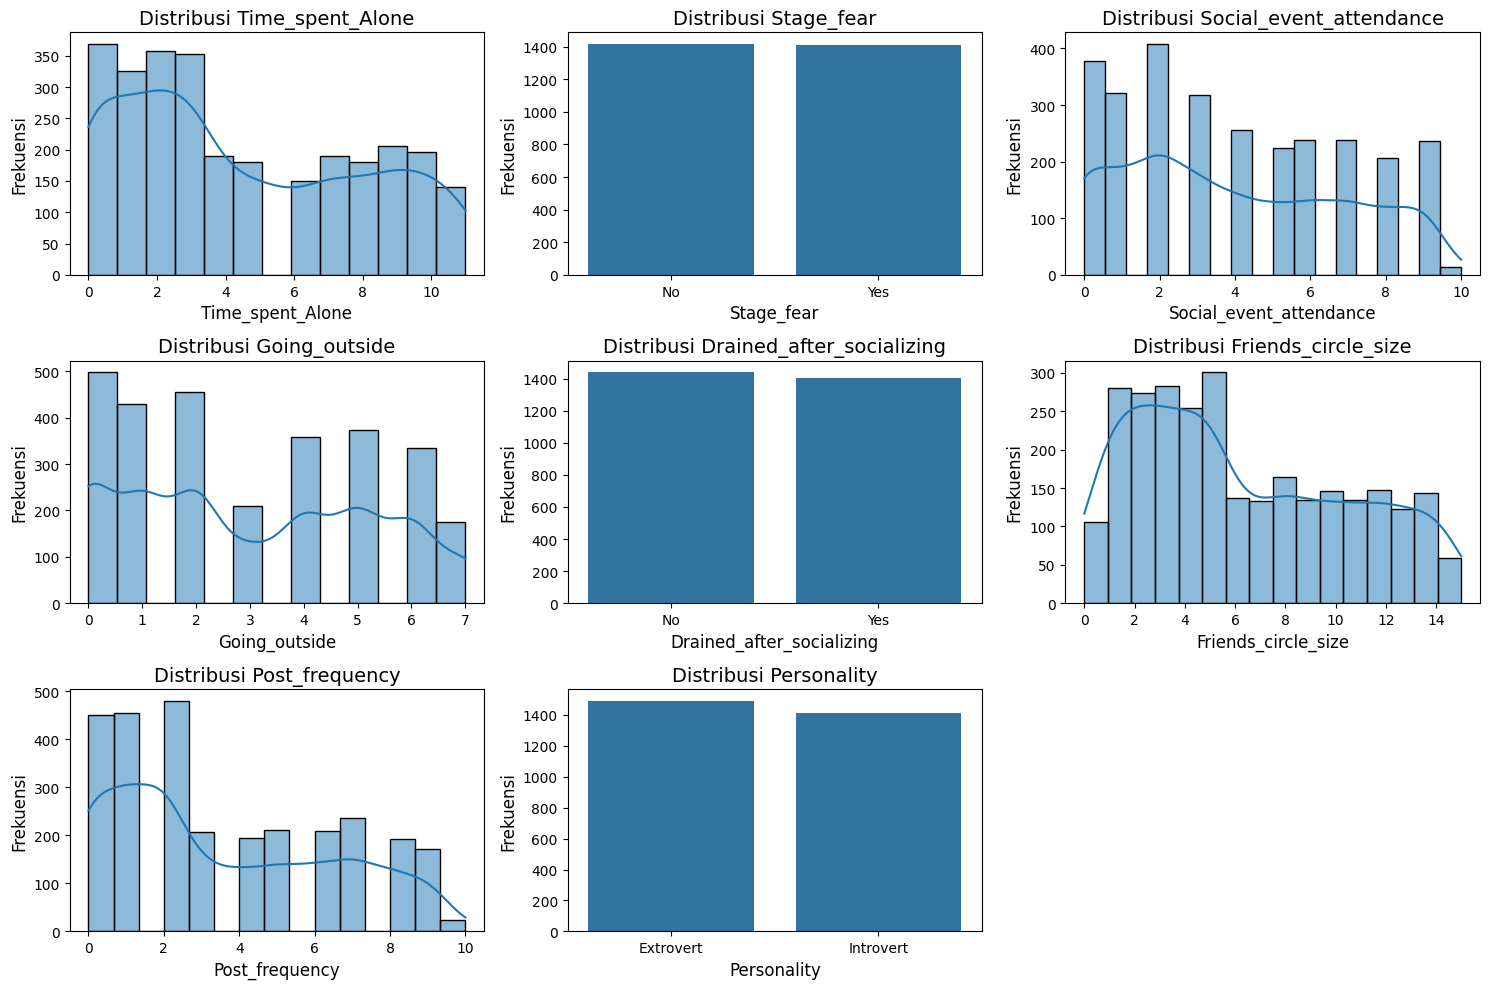

In [105]:
# Mengatur ukuran grafik
plt.figure(figsize=(15, 10))

# Menghitung jumlah kolom untuk histogram
n_cols = len(df_personality.columns)

# Membuat subplot untuk setiap kolom
for i, column in enumerate(df_personality.columns, 1):
    plt.subplot(3, 3, i)  # Menyesuaikan ukuran grid
    if df_personality[column].dtype == 'object':
        sns.countplot(x=column, data=df_personality)
    else:
        sns.histplot(df_personality[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

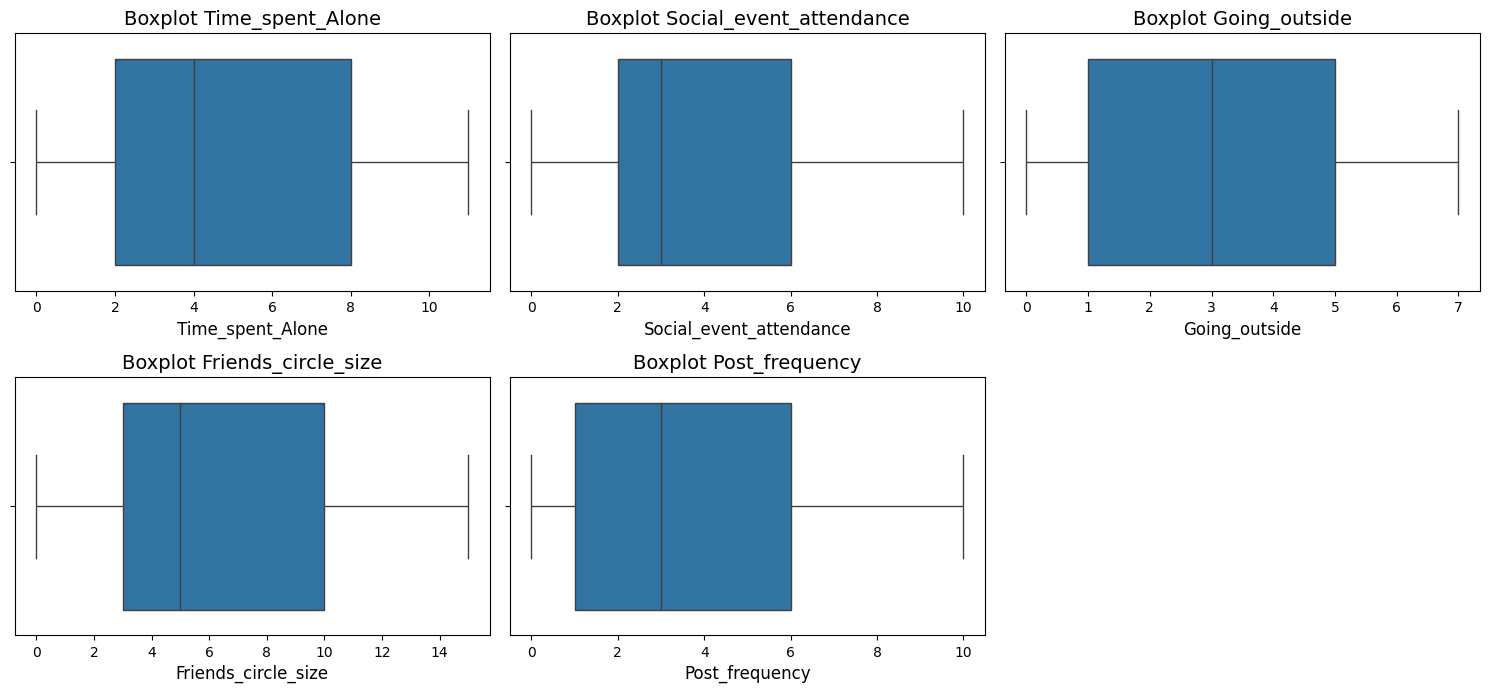

In [106]:
# Mengatur ukuran grafik
plt.figure(figsize=(15, 10))

# Membuat subplot untuk setiap kolom numerik
for i, column in enumerate(df_personality.select_dtypes(include='number').columns, 1):
    plt.subplot(3, 3, i)  # Menyesuaikan ukuran grid
    sns.boxplot(x=df_personality[column])
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [107]:
# Mengidentifikasi missing values
missing_values = df_personality.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
dtype: int64


## Menangani Missing Value

In [110]:
# Menghapus baris dengan missing values
df_personality.dropna(axis=0, inplace=True)

In [111]:
# Mengidentifikasi missing values
missing_values = df_personality.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [112]:
# Cek ukuran data untuk memastikan baris sudah di-drop
df_personality.shape

(2477, 8)

## Menangani Outliers

In [114]:
# Menghitung Q1, Q3, dan IQR untuk setiap kolom numerik
for column in df_personality.select_dtypes(include='number').columns:
    Q1 = df_personality[column].quantile(0.25)
    Q3 = df_personality[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyimpan informasi tentang outliers
    outliers = df_personality[(df_personality[column] < lower_bound) | (df_personality[column] > upper_bound)]
    print(f'Outliers for {column}:\n', outliers)

Outliers for Time_spent_Alone:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Social_event_attendance:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Going_outside:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Friends_circle_size:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Post_frequency:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained

In [115]:
# Menghapus outliers untuk setiap kolom numerik
for column in df_personality.select_dtypes(include='number').columns:
    Q1 = df_personality[column].quantile(0.25)
    Q3 = df_personality[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_personality = df_personality[(df_personality[column] >= lower_bound) & (df_personality[column] <= upper_bound)]

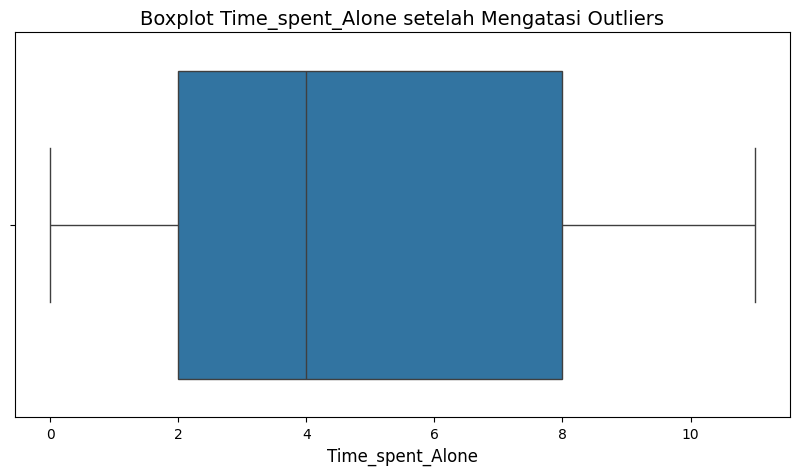

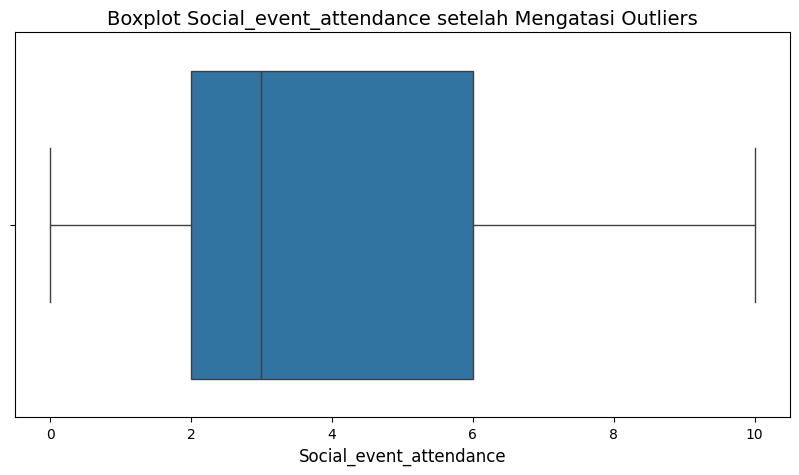

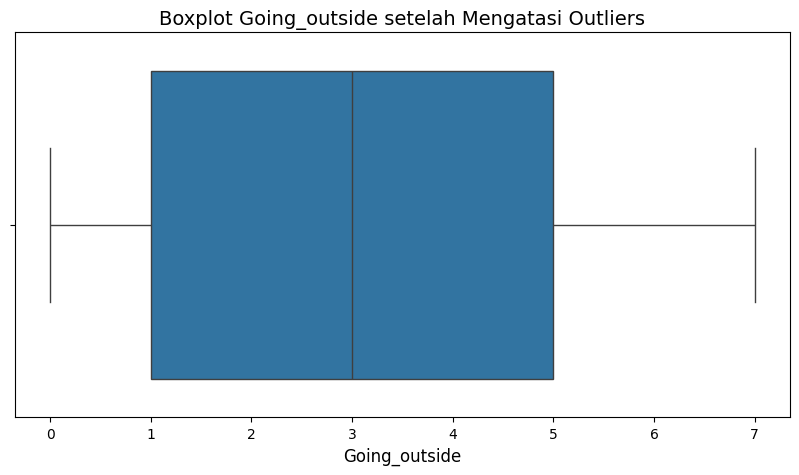

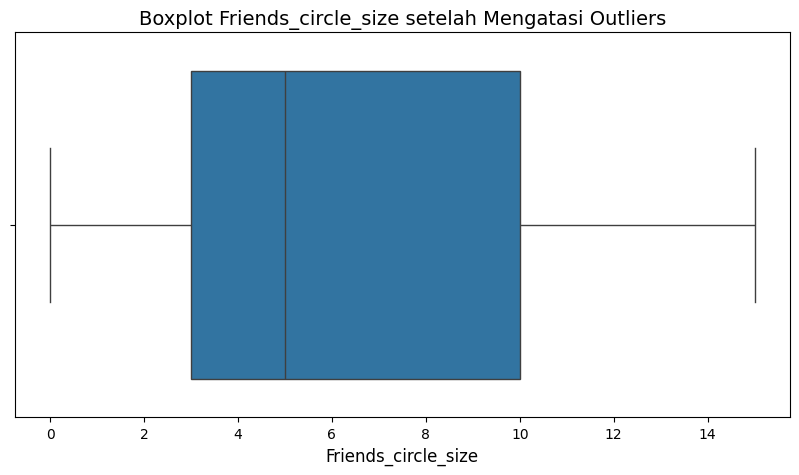

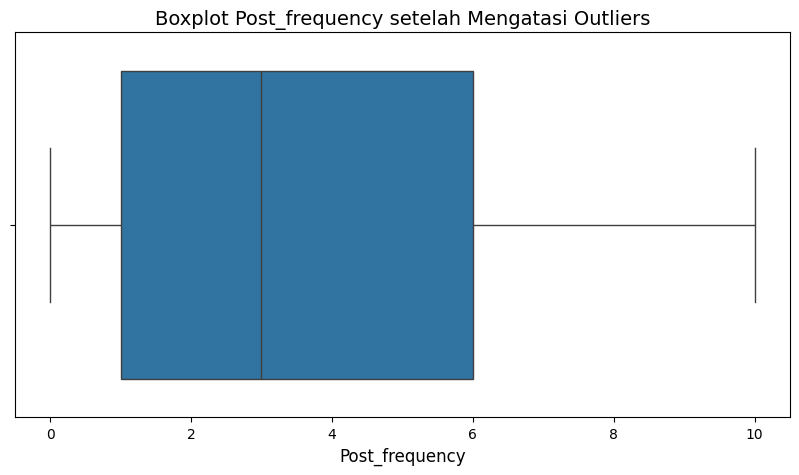

In [116]:
# Memeriksa kembali distribusi setelah penanganan outliers
for column in df_personality.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_personality[column])
    plt.title(f'Boxplot {column} setelah Mengatasi Outliers')
    plt.xlabel(column)
    plt.show()

## Univariate Analysis

### Categorical Feature

<ipython-input-121-ac316696cc1b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_personality, palette='Set2')
<ipython-input-121-ac316696cc1b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_personality, palette='Set2')


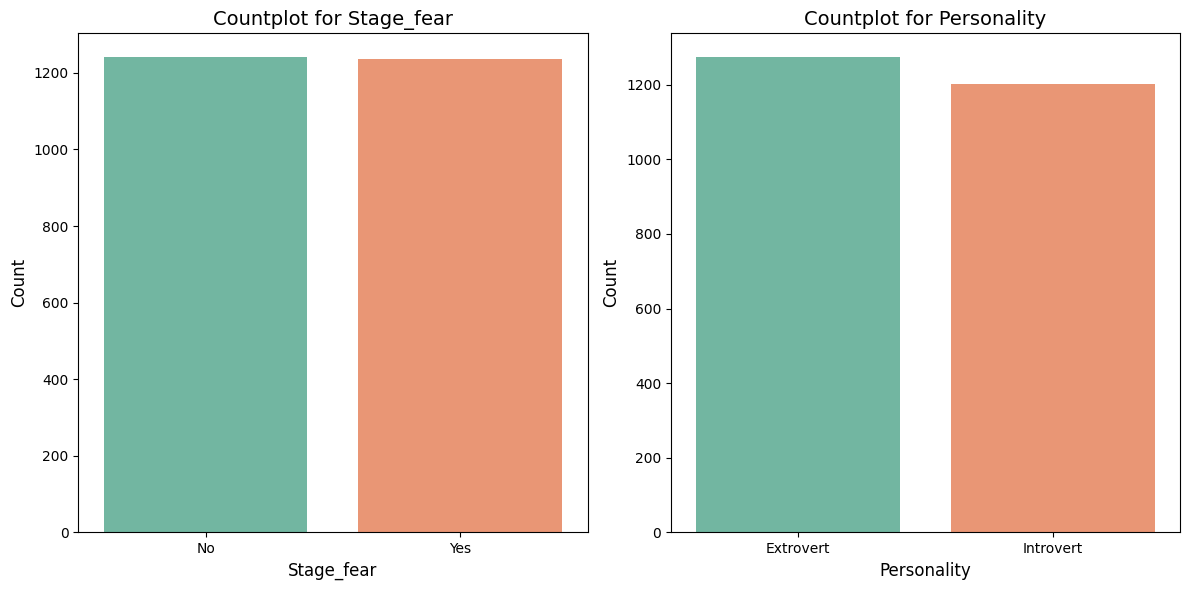

In [121]:
# Grafik Countplot untuk kolom kategorikal
categorical_features = ['Stage_fear', 'Personality']

plt.figure(figsize=(12, 6))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(x=column, data=df_personality, palette='Set2')
    plt.title(f'Countplot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Numerical Feature

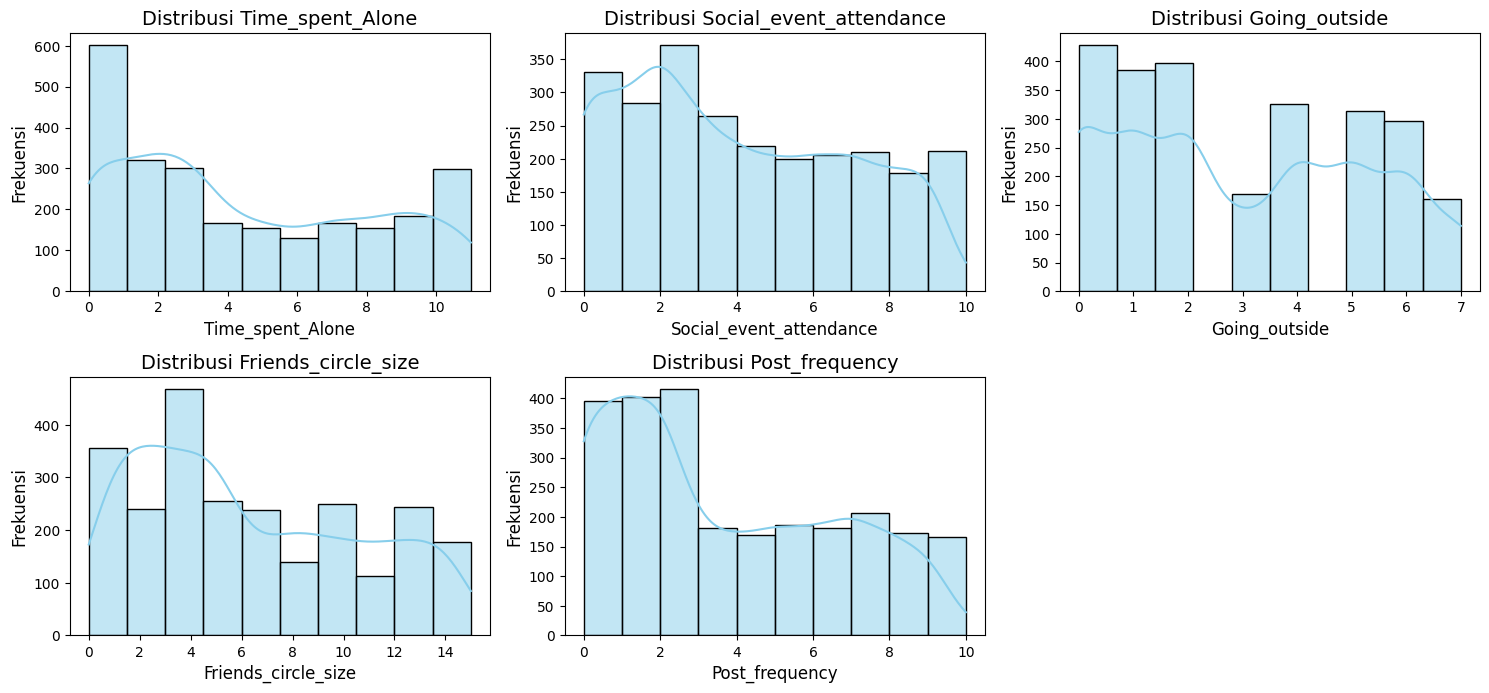

In [122]:
# Grafik Histogram dan Boxplot untuk fitur numerik
numerical_features = df_personality.select_dtypes(include='number').columns

# Histogram
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # menyesuaikan ukuran grid
    sns.histplot(df_personality[column], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

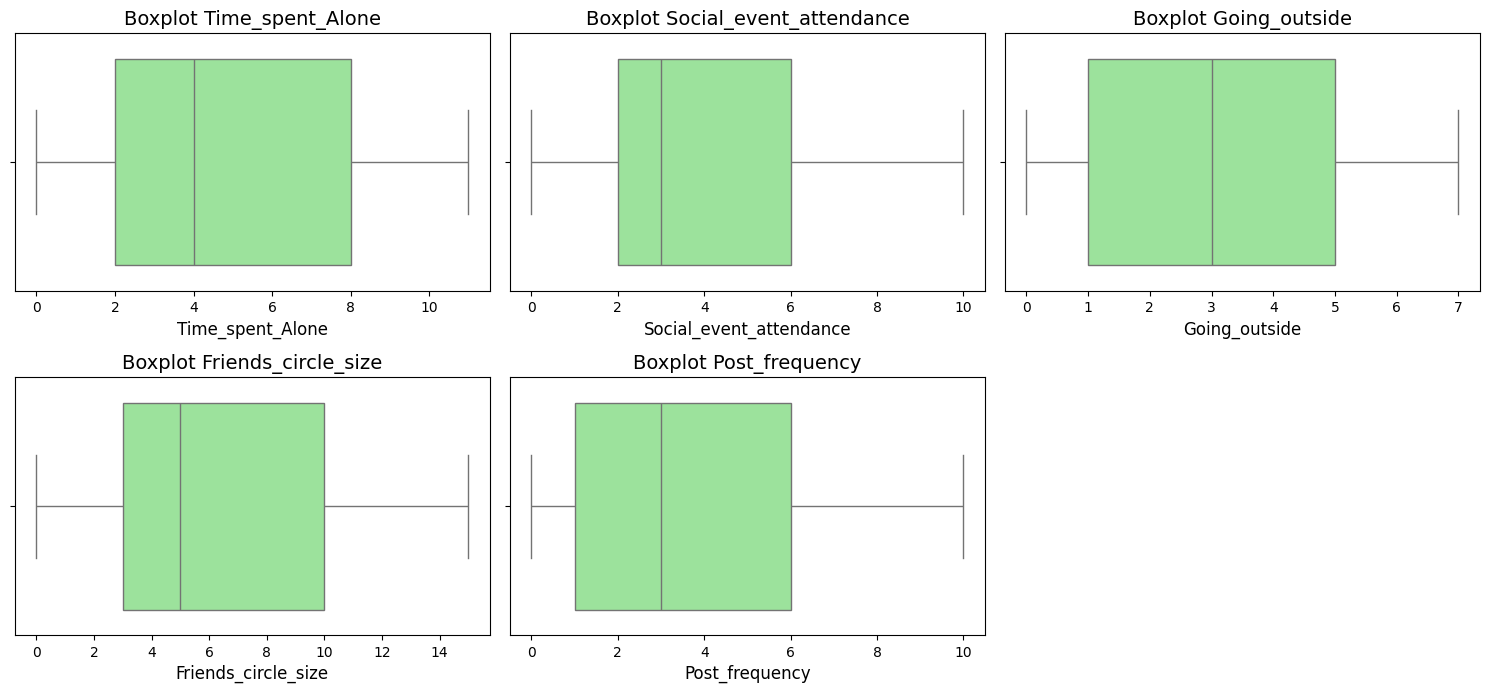

In [123]:
# Boxplot
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # menyesuaikan ukuran grid
    sns.boxplot(x=df_personality[column], color='lightgreen')
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis - Multivariate Analysis

In [152]:
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,Extrovert
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,Introvert
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,Introvert
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,Extrovert
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,Extrovert


In [149]:
# Mapping kolom kategorikal menjadi numerik
df_personality['Stage_fear'] = df_personality['Stage_fear'].map({'No': 0, 'Yes': 1})
df_personality['Drained_after_socializing'] = df_personality['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

In [151]:
# Mengganti tipe Personality menjadi kategori, jika perlu
df_personality['Personality'] = df_personality['Personality'].astype('category')

In [153]:
print(df_personality.dtypes)

Time_spent_Alone              float64
Stage_fear                    float64
Social_event_attendance       float64
Going_outside                 float64
Drained_after_socializing     float64
Friends_circle_size           float64
Post_frequency                float64
Personality                  category
dtype: object


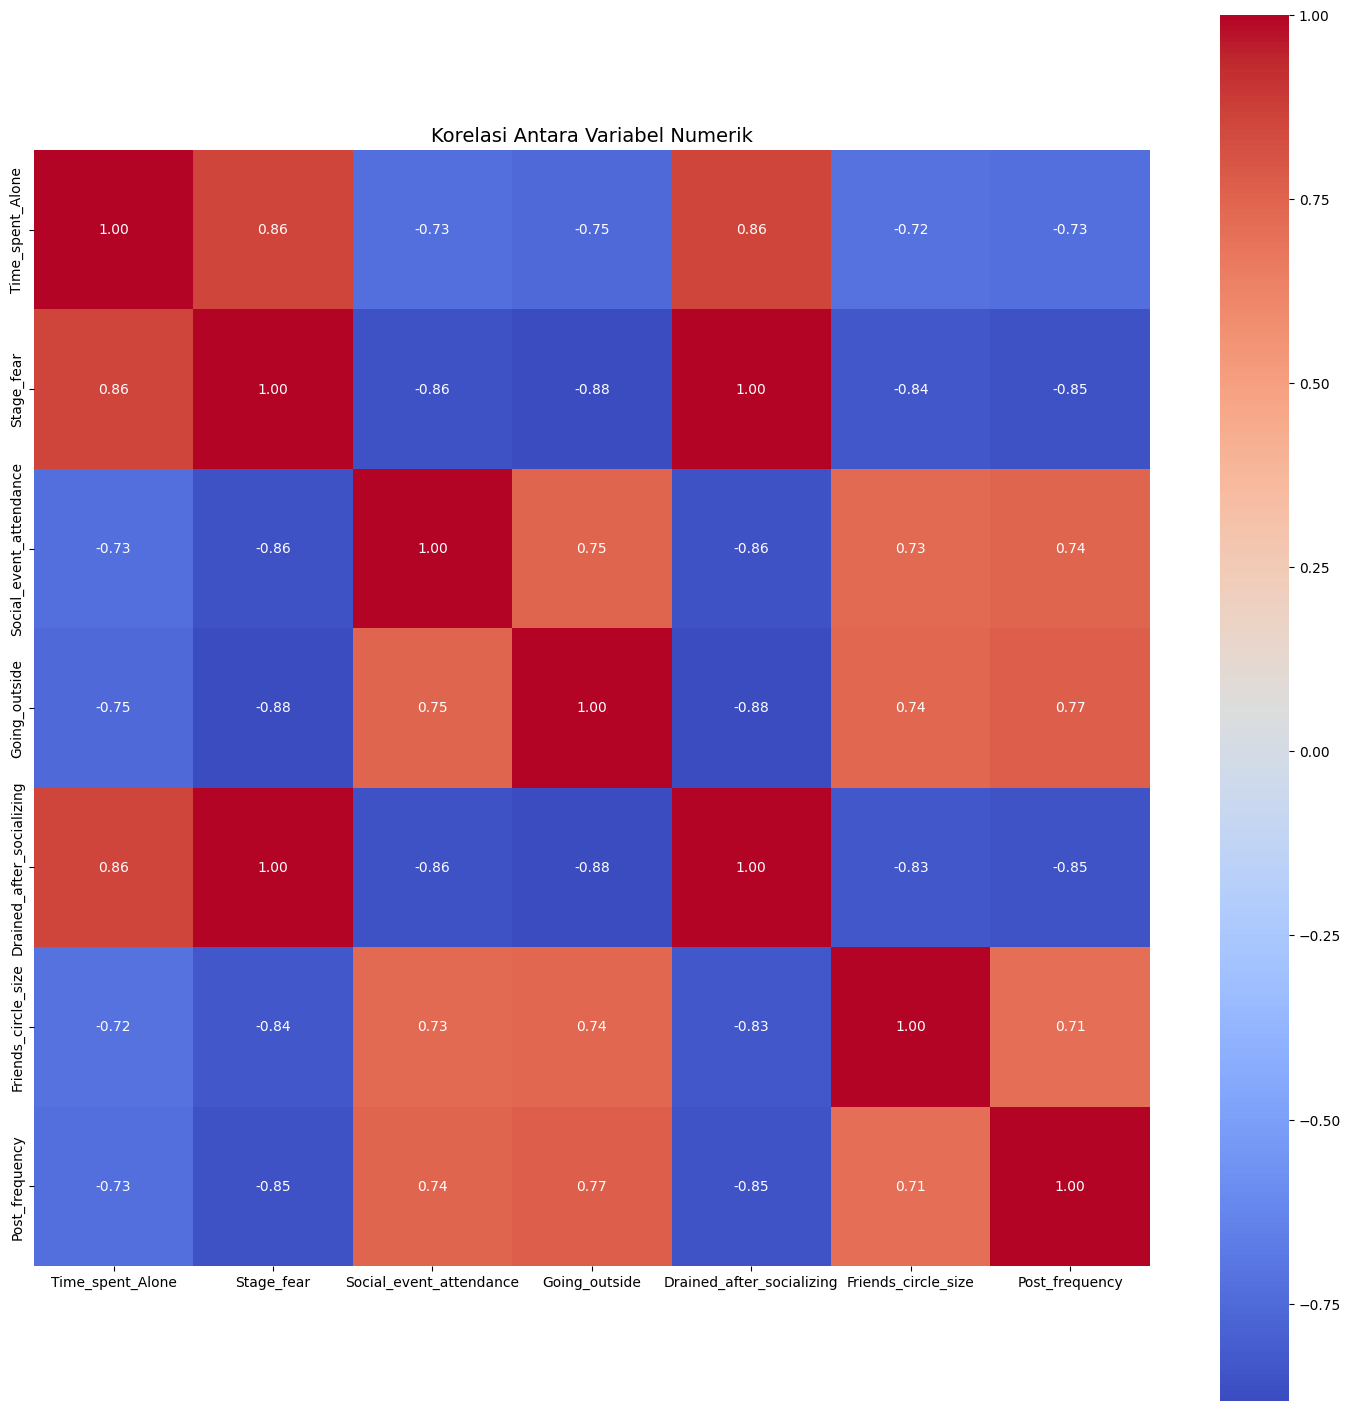

In [162]:
# Menghitung korelasi
correlation_matrix = df_personality.corr(numeric_only=True)

# Membuat heatmap untuk melihat korelasi
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korelasi Antara Variabel Numerik')
plt.show()

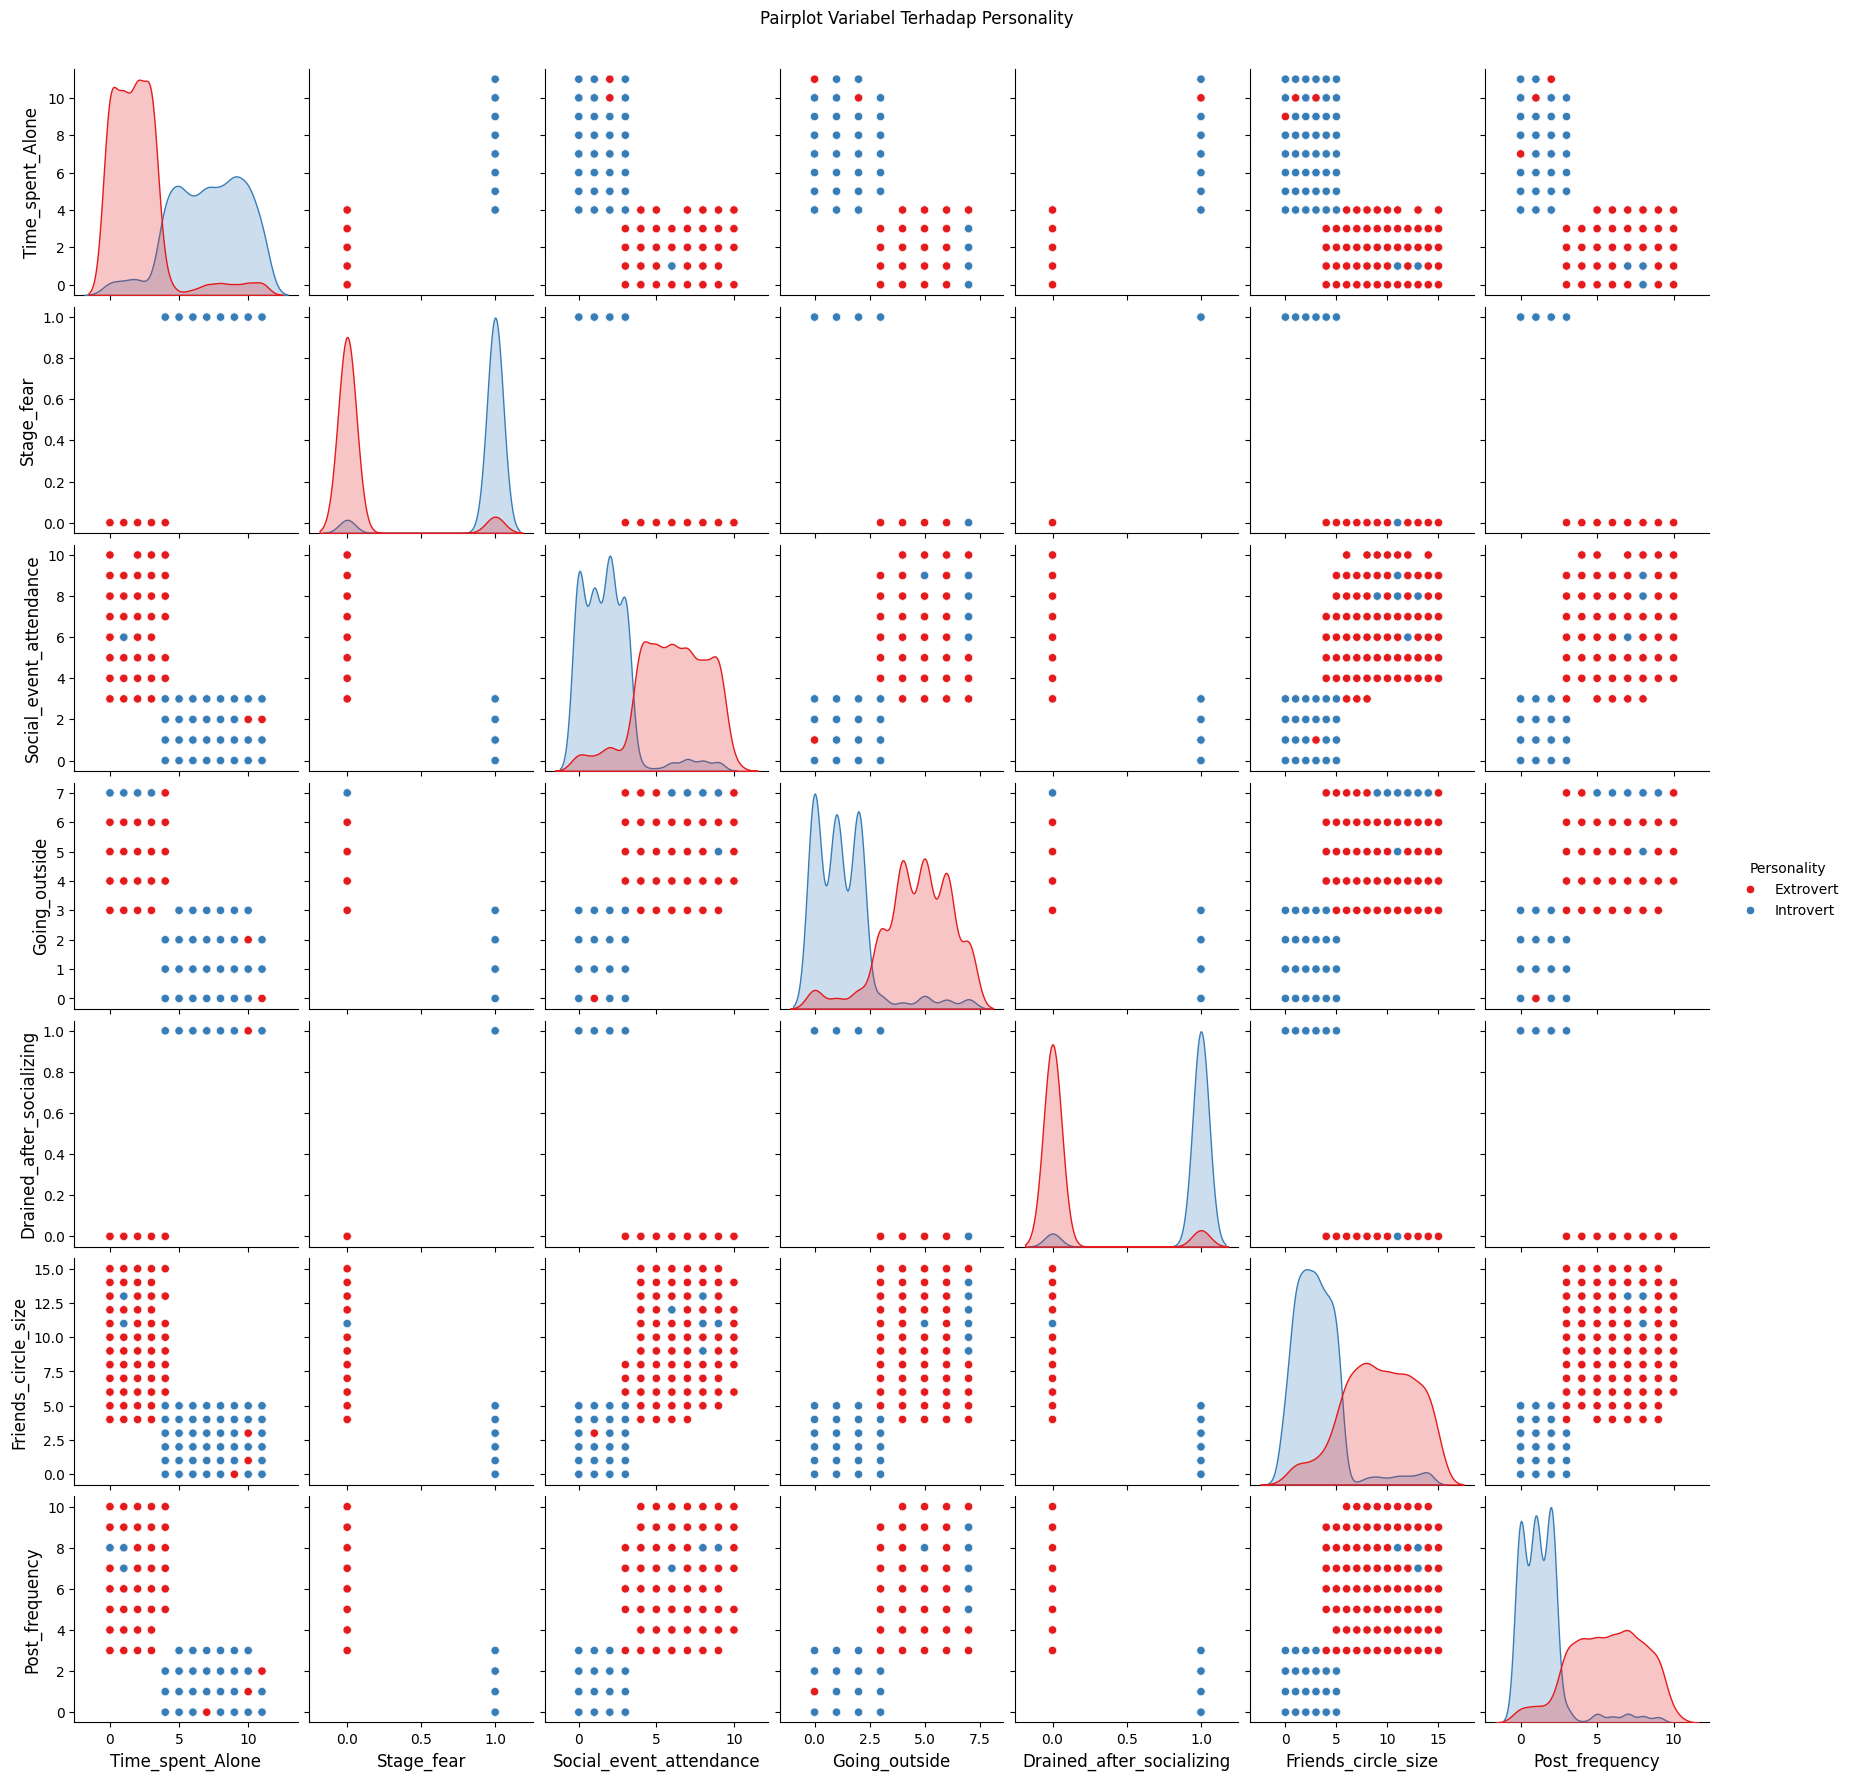

In [163]:
# Menggunakan Pairplot
sns.pairplot(df_personality, hue='Personality', palette='Set1')
plt.suptitle('Pairplot Variabel Terhadap Personality', y=1.02)
plt.show()

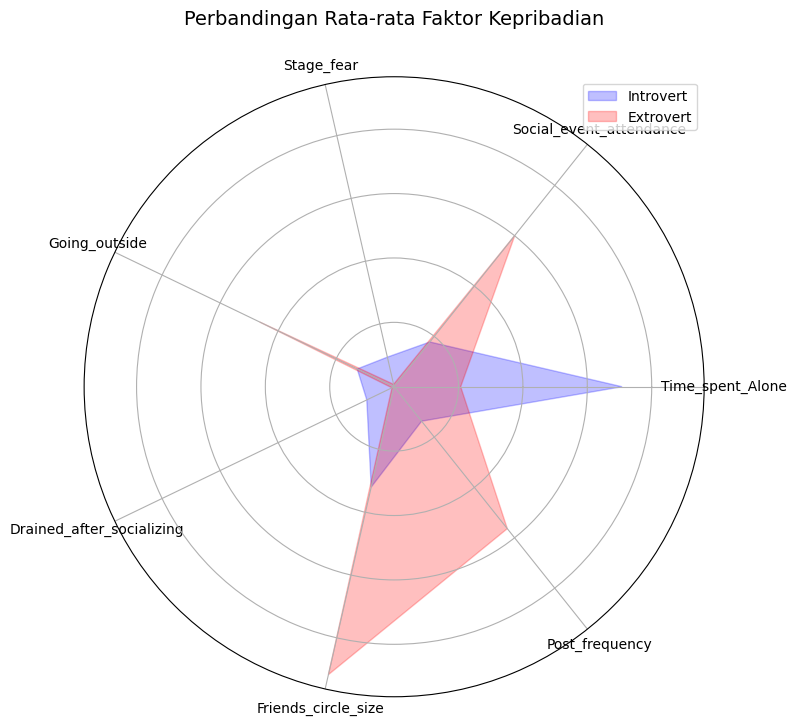

In [167]:
# Data untuk radar chart
categories = ['Time_spent_Alone', 'Social_event_attendance', 'Stage_fear', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
introvert_means = df_personality[df_personality['Personality'] == 'Introvert'][categories].mean().values
extrovert_means = df_personality[df_personality['Personality'] == 'Extrovert'][categories].mean().values

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
introvert_means = np.concatenate((introvert_means,[introvert_means[0]]))
extrovert_means = np.concatenate((extrovert_means,[extrovert_means[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(polar=True))
ax.fill(angles, introvert_means, color='blue', alpha=0.25, label='Introvert')
ax.fill(angles, extrovert_means, color='red', alpha=0.25, label='Extrovert')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Perbandingan Rata-rata Faktor Kepribadian\n\n')
plt.legend(loc='upper right')
plt.show()

# Data Preparation

In [169]:
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,Extrovert
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,Introvert
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,Introvert
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,Extrovert
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,Extrovert


## Encoding Data Categorical

In [183]:
# Melakukan encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df_personality, columns=['Stage_fear', 'Drained_after_socializing', 'Post_frequency', 'Personality'], drop_first=True)

In [275]:
df_encoded.shape

(2900, 5)

In [276]:
# Menampilkan bentuk dari data yang sudah diencode
df_encoded.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Personality_Introvert
0,4.0,4.0,6.0,13.0,False
1,9.0,0.0,0.0,0.0,True
2,9.0,1.0,2.0,5.0,True
3,0.0,6.0,7.0,14.0,False
4,3.0,9.0,4.0,8.0,False


In [239]:
print(df_encoded.columns)

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Personality_Introvert'],
      dtype='object')


In [240]:
valid_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size']

# Pastikan semua kolom yang ingin diambil ada dalam DataFrame
missing_columns = [col for col in valid_columns if col not in df_encoded.columns]
if missing_columns:
    print(f"Kolom yang tidak ditemukan: {missing_columns}")
else:
    X = df_encoded[valid_columns]
    y = df_encoded["Personality_Introvert"]

## Train Test Split

In [259]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standarisasi

In [279]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [281]:
# Terapkan PCA
pca = PCA(n_components=0.95)  # Mengambil 95% varians
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model Development

## KNN

In [282]:
# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mengubah nilai k sesuai kebutuhan
knn.fit(X_train_pca, y_train)  # Pastikan y_train sudah terdefinisi

# Melakukan prediksi
y_pred_knn = knn.predict(X_test_pca)

## Random Forest

In [283]:
# Membuat model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Melakukan prediksi
y_pred_rf = rf.predict(X_test_pca)

## AdaBoost

In [284]:
# Membuat model AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train_pca, y_train)

# Melakukan prediksi
y_pred_ada = ada.predict(X_test_pca)

# Model Evaluation

KNN Evaluation:
Accuracy: 0.9075144508670521
Confusion Matrix:
 [[250  26]
 [ 22 221]]
              precision    recall  f1-score   support

       False       0.92      0.91      0.91       276
        True       0.89      0.91      0.90       243

    accuracy                           0.91       519
   macro avg       0.91      0.91      0.91       519
weighted avg       0.91      0.91      0.91       519



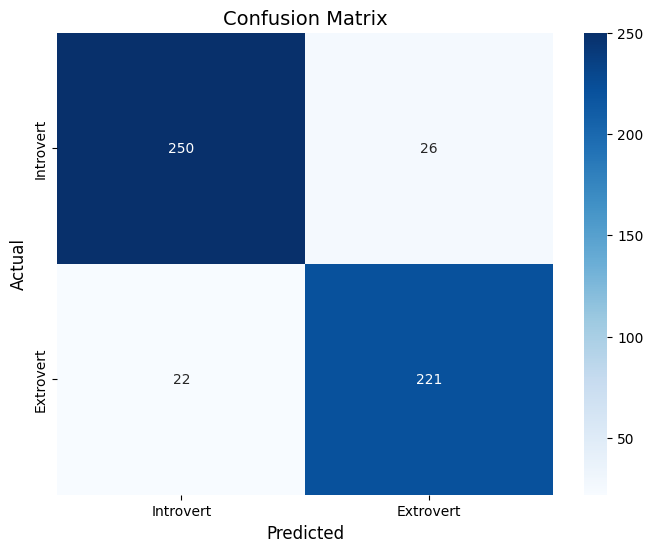

In [294]:
# KNN Evaluation
print("KNN Evaluation:")
y_pred_knn = knn.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
classes = ['Introvert', 'Extrovert']

# Membuat heatmap 2D
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Random Forest Evaluation:
Accuracy: 0.8959537572254336
Confusion Matrix:
 [[246  30]
 [ 24 219]]
              precision    recall  f1-score   support

       False       0.91      0.89      0.90       276
        True       0.88      0.90      0.89       243

    accuracy                           0.90       519
   macro avg       0.90      0.90      0.90       519
weighted avg       0.90      0.90      0.90       519



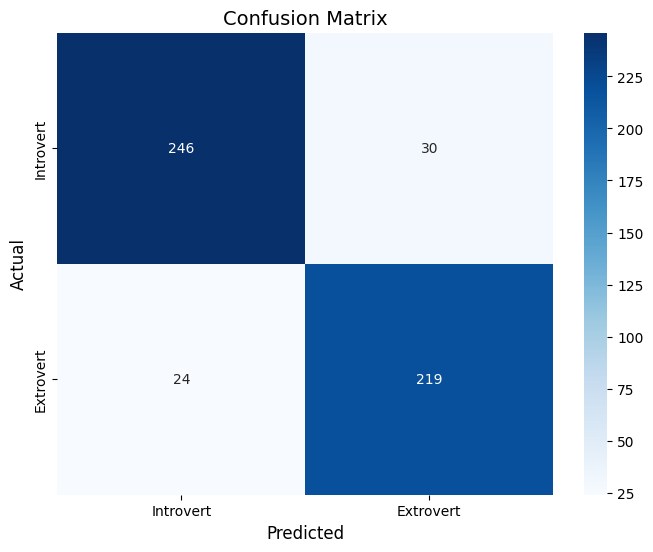

In [293]:
# Random Forest Evaluation
print("Random Forest Evaluation:")
y_pred_rf = rf.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
classes = ['Introvert', 'Extrovert']

# Membuat heatmap 2D
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

AdaBoost Evaluation:
Accuracy: 0.9210019267822736
Confusion Matrix:
 [[252  24]
 [ 17 226]]
              precision    recall  f1-score   support

       False       0.94      0.91      0.92       276
        True       0.90      0.93      0.92       243

    accuracy                           0.92       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.92      0.92      0.92       519



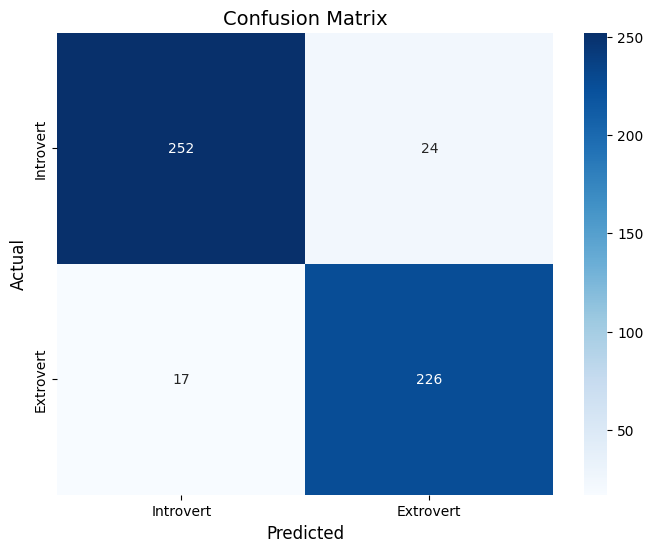

In [292]:
# AdaBoost Evaluation
print("AdaBoost Evaluation:")
y_pred_ada = ada.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_ada)
classes = ['Introvert', 'Extrovert']

# Membuat heatmap 2D
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()